<font size="6px" font color="blue" face="Times New Roman"><b> K-Means</b></font>

#### Código desenvolvido no meu TCC em colaboração com meus orientdores:

#### Dr. Victor Carreira: http://lattes.cnpq.br/9663791782095105
#### Dr.  Rodrigo Bijani: http://lattes.cnpq.br/2331435604103641


# Resumo teórico do método:


## K-Means Clustering

 K-means clustering is the most commonly used unsupervised machine learning algorithm for partitioning a given data set into a set of k groups (i.e. k clusters), where k represents the number of groups pre-specified by the analyst. It classifies objects in multiple groups (i.e., clusters), such that objects within the same cluster are as similar as possible (i.e., high intra-class similarity), whereas objects from different clusters are as dissimilar as possible (i.e., low inter-class similarity). In k-means clustering, each cluster is represented by its center (i.e, centroid) which corresponds to the mean of points assigned to the cluster.
 
 
 

 

#### The Basic Idea
The basic idea behind k-means clustering consists of defining clusters so that the total intra-cluster variation (known as total within-cluster variation) is minimized. There are several k-means algorithms available. The standard algorithm is the Hartigan-Wong algorithm (1979), which defines the total within-cluster variation as the sum of squared distances Euclidean distances between items and the corresponding centroid:

  
 $$
 \begin{equation}
 W(C_{k}) =  \sum_{x_{i} \in C_{k}} (x_{i}-\mu_{k})^{2}
 \end{equation}
 $$ 
 
 where:

$x_{i}$ is a data point belonging to the cluster $C_{k}$. And $\mu_{k}$ is the mean value of the points assigned to the cluster $C_{k}$.Each observation ($x_{i}$) is assigned to a given cluster such that the sum of squares (SS) distance of the observation to their assigned cluster centers ($\mu_{k}$) is minimized.

Total within-cluster variation as:

  
 $$
 \begin{equation}
 \sum^{m}_{k=1} W(C_{k}) = \sum^{m}_{k=1} \sum_{x_{i} \in C_{k}} (x_{i}-\mu_{k})^{2}
 \end{equation}
 $$ 


Above equation is known as **total withiness** . It is the total within-cluster sum of square measures the compactness (i.e goodness) of the clustering and we want it to be as small as possible.


#### How to evaluate results:

The problem in correct evaluating this algorithm is that the best result will depend of the initial numbers of centroids. The dependence of centroid numbers will lead to differents clusters classes. Runnig this algorithm many times is one of the way to reduce problems in classification. 

The criteria to compute the best result is the minimal convergence by fitting the equation:

 $$
 \begin{equation}
 \sum^{m}_{k=1} \sum_{x_{i} \in C_{k}} \Vert x_{i}-\mu_{k} \Vert^{2}
 \end{equation}
 $$ 

Where $m$ is the total number of subgroups in wich your data was divided. The constructed model must be able to minimize the square distances sum of the data sample to each centroid class. This criteria is called **inertia**. 

#### References:


[ Métricas e  k-means](https://uc-r.github.io/kmeans_clustering)
,
[Iris](https://archive.ics.uci.edu/ml/datasets/iris)
,
[Vizeu(2016)](../../references/071219/Vizeu2016.pdf)
,
[Laço no K-means](https://realpython.com/k-means-clustering-python/)

In [1]:
############ Script para carregar os dados adquiridos a partir da modelagem e aplicar os classificadores ##############

import numpy as np
import matplotlib.pyplot as plt
from pylab import * 
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd
import sys
import matplotlib.colors as colors 

# Módulos internos:
sys.path.insert(0,'../modules')
from imod import Debug as db
from imod import Preprocessing as pp
from imod import Postprocessing as po
from normalizations import minmax
#from modules import disper as dis


# Módulos do k-means:
from sklearn.cluster import KMeans
from sklearn import datasets

# UTILIZAÇÃO DO APPYNHO PARA FAZER GRÁFICOS DE PERFIS:
#---------------------
from appynho_2 import plotagem as plm2
%matplotlib inline

# Dados de entrada

#### Carregamento dos dados (10% ruído) de poço e do dicionário da modelagem

In [2]:
# Carregamento dos dados (10% ruído) de poço e do dicionário da modelagem
cab_10 = ['prof', 'rock_id', 'rhob', 'gr', 'dt']
data_10 = pd.read_csv('../saida/dados_10.txt', sep='\s+',
                      skiprows=1, names = cab_10, usecols=(0,1,2,3,5) )


#### Leitura  do dataframe com os centróides verdadeiros, obtidos a partir do poço modelado:

In [3]:
# leitura do dataframe de centroides advindos do poço:
centroides_verdadeiros= pd.read_csv('../saida/centroides_poco.txt', 
                    sep='\s+', usecols=(0,1,2,3,4))

#### Normalização dos centroides verdadeiros:

In [4]:
# Normalizacao do GR:
a1 = centroides_verdadeiros.gr.min()
b1 = centroides_verdadeiros.gr.max()
#-------------------------
centroides_verdadeiros['gr_norm'] = minmax(centroides_verdadeiros.gr, a1, b1)

In [5]:
# Normalizacao do RHOB:
a2 = centroides_verdadeiros.rhob.min()
b2 = centroides_verdadeiros.rhob.max()
#-----------------------------
centroides_verdadeiros['rhob_norm'] = minmax( centroides_verdadeiros.rhob, a2, b2)

In [6]:
# Normalizacao do DT:
a3 = centroides_verdadeiros.dt.min()
b3 = centroides_verdadeiros.dt.max()
#-------------------------
centroides_verdadeiros['dt_norm'] = minmax(centroides_verdadeiros.dt, a3, b3)

#### Normalização dos perfis em função dos coeficientes de normalização dos centroides verdadeiros:

In [7]:
gr_norm   = minmax(data_10.gr,   a1, b1 )
rhob_norm = minmax(data_10.rhob, a2, b2 )
dt_norm   = minmax(data_10.dt,   a3, b3 )

In [8]:
data_10['gr_norm'] = gr_norm
data_10['rhob_norm'] = rhob_norm
data_10['dt_norm'] = dt_norm

#### Separação dos dados de poço em atributos (perfis) e alvos (codigos de rocha):

In [9]:
######################### Dados de poço sintético para ruído de 5 % SEM os códigos de rocha ###########################
df10 = {'rhob': data_10.rhob_norm, 'gr': data_10.gr_norm, 'dt': data_10.dt_norm} # atributos
target_df10 = {'rock_id':data_10.rock_id}# alvos

#Criação dos data frames:
data = pd.DataFrame(df10)
target = pd.DataFrame(target_df10)

#### Leitura dos informações sobre as cores das rochas para o gráfico:

In [10]:
### Dicionário da parte de modelagem com informações das cores RGB para o plot K-Means:
cab_d = ['Hex','Rocha','R', 'G','B', 'A', 'ID']
cores = pd.read_csv('../saida/dicionario_click_poco.txt', sep='\s+',skiprows=1, names = cab_d)

# Criacao do dicionario:
dic = {a_: [b_, c_, d_, e_, f_, g_] for a_, b_, c_, d_, e_, f_, g_ 
       in zip(cores.ID, cores.Hex, cores.Rocha, cores.R, cores.G, cores.B, cores.A)}

In [11]:
#cria um perfil de cores verdadeiras
perfcor = []
for i in range (len(data_10)):
    for j in range (len(cores)):
        if data_10.rock_id.iloc[i] == cores.ID.iloc[j]:
            perfcor.append(cores.Hex.iloc[j])

In [12]:
centroides_verdadeiros['hex'] = cores.Hex

# Modelagem via K-Means para classificação

In [13]:
# Cozinha do K-means: ### Testes com 9 clusters e 2 rochas "acertadas"!

nprop  = 3                 # número de propriedades físicas ativas
nclust  = 6               # numero de clusters utilizados
maxiter = 50 ###              # numero maximo de iteracoes 
toler   = 1e-5 ###        # tolerancia para o criterio de parada 
ninit   = 10 ###               # numero de inicializacoes do Kmeans

estimators = KMeans(n_clusters=nclust, 
                    max_iter=maxiter, 
                    init='k-means++', ### Com k-means++ o método só acha 7 rochas, ja com random ele acha 8.
                    tol=toler, 
                    n_init=ninit,
                    algorithm="auto")

estimators.fit(data)
y_kmeans = estimators.fit(data)

In [14]:
dist_est = estimators.cluster_centers_

#### Cálculo das distâncias entre os centroides verdadeiros e os do kmeans para identificar as cores de cada litologia verdadeira (imelhor):

In [15]:
dist = np.zeros((nclust, len(centroides_verdadeiros)))

for j in range(len(centroides_verdadeiros)):
    for i in range(nclust):
        dist[i,j] = np.sqrt( ( (dist_est[i,0] - centroides_verdadeiros.rhob_norm[j])**2 + 
                   (dist_est[i,1] - centroides_verdadeiros.gr_norm[j])**2  ) + 
                    (dist_est[i,2] - centroides_verdadeiros.dt_norm[j])**2 )
        
    # Indice da menor distancia entre o i-esimo centroide do kmeans em relacao ao j-esimo centroide verdadeiro
    imelhor = np.argmin(dist, axis=1) # O argumento mínimo entre a distância estimada dos centros pelo k-means
                                        #e os centros verdadeiros normalizados.

In [16]:
cores

,Hex,Rocha,R,G,B,A,ID
0,#46FF50,folhelho2,70,255,80,255,1
1,#1EAF0A,folhelho3,30,175,10,255,2
2,#FFFA05,arenito1,255,250,5,255,4
3,#FAAA14,conglomerado,250,170,20,255,6
4,#000078,marga1,0,0,120,255,7
5,#0000DC,marga2,0,0,220,255,8


## Adaptação entre index e codigo de rocha (ID):

In [17]:
# Rodada oficial: array([2, 3, 1, 4, 0, 2, 6, 5, 8], dtype=int64)
icor = np.array(cores.ID.iloc[imelhor]) 

In [18]:
# conversao de indice do array imelhor para os codigos de rocha:
print(icor, imelhor)

[6 1 7 4 2 6] [3 0 4 2 1 3]


## Etapas de preparação para gráficos envolvendo as cores de rocha:

In [19]:
# relação entre o nome da rocha e a cor hex com o indice vindo do kmeans:
rock_kmeans = []
hex_kmeans = []
for i in range(len(imelhor)):
    rock_kmeans.append(centroides_verdadeiros.rock[imelhor[i]])
    hex_kmeans.append(centroides_verdadeiros.hex[imelhor[i]])

In [20]:
#cria um perfil de cores verdadeiras
perfcor_kmeans = []
for i in range (len(data_10)):
    for j in range (len(cores)):
        if icor[estimators.labels_[i]] == cores.ID.iloc[j]:
            perfcor_kmeans.append(cores.Hex.iloc[j])
len(perfcor_kmeans)

830

In [21]:
# Dicionario com as cores e os nomes para grafico de dispersao:
dic_k = {a_: [b_, c_] for a_, b_, c_ in zip(icor, hex_kmeans, rock_kmeans)}
dic_k

{6: ['#FAAA14', 'conglomerado'],
 1: ['#46FF50', 'folhelho2'],
 7: ['#000078', 'marga1'],
 4: ['#FFFA05', 'arenito1'],
 2: ['#1EAF0A', 'folhelho3']}

# Saídas (Gráficos)

#### Modelo predito vs modelo verdadeiro e propriedades físicas

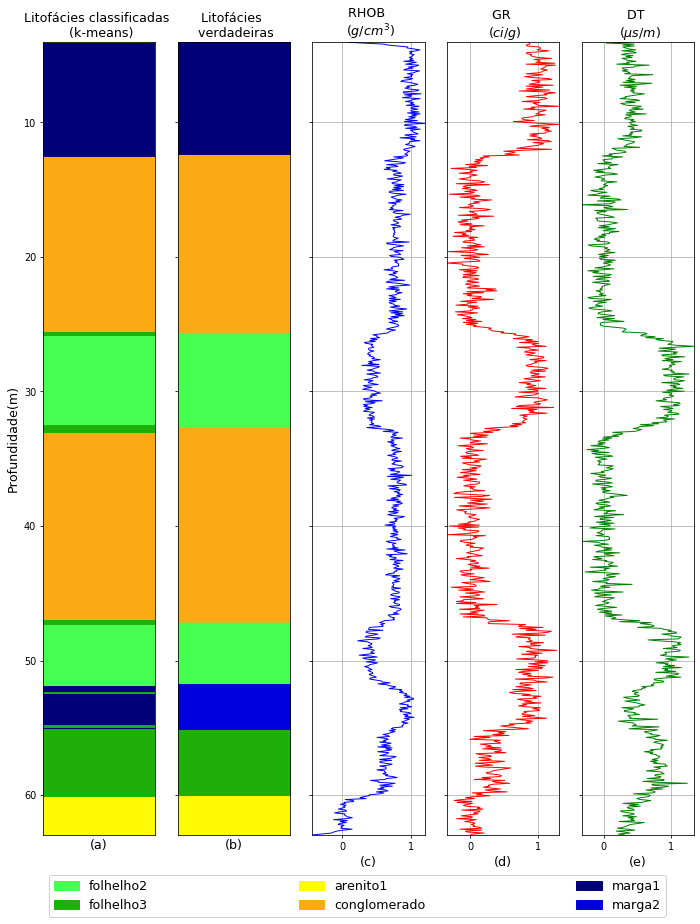

In [22]:
#from collections import Counter 
#from collections import defaultdict 
#import operator 

def order(x):
    """Cria uma lista começando do zero com o mesmo tamanho do dicionario"""
    r= [0]
    for i in range(x+1):
        i=i+1
        r.append(i)
    return r

# Cáluculo do dicionário total:

# Gerando a imagem do poço

padrao={'comprimento':12,
            'altura':15
         }

figure2 = plm2(5, padrao)

figure2.plot_l2(0,np.array(icor[estimators.labels_]), np.array(data_10.prof), 
                dic_k,{'titulo':'Litofácies classificadas \n (k-means)', 'descricao_y':'Profundidade(m)','descricao_x':'(a)'})

figure2.plot_l2(1,np.array(data_10.rock_id), np.array(data_10.prof), 
                dic,{'titulo':'Litofácies \n verdadeiras', 'descricao_y':'Depth(m)','descricao_x':'(b)'})

figure2.plot_s(2,data.iloc[:, 0].values, data_10.prof,
               {'titulo':'RHOB \n $(g/cm^{3})$','cor':'b','descricao_x':'(c)'})

figure2.plot_s(3,data.iloc[:, 1].values, data_10.prof,
               {'titulo':'GR \n $(ci/g$)','cor':'r','descricao_x':'(d)'})

figure2.plot_s(4,data.iloc[:, 2].values, data_10.prof,
               {'titulo':'DT \n $(\mu s/m)$','cor':'g','descricao_x':'(e)'})

cri = np.arange(len(dic_k), len(dic) + len(dic_k)) # parâmetro "ordem" para legenda.
# Tem que ser + dic_k, porque não necessariamente nclust será igual ao tamanho de dic_k

figure2.legenda({'ancoragem':(0.05, 0.05, 5.5, -0.10),'colunas':3,'ordem': list(cri)})
    
plt.savefig('../final/perfis_classificados.pdf', dpi=300, bbox_inches = 'tight', transparent = True)
plt.savefig('../final/perfis_classificados.png', dpi=300, bbox_inches = 'tight', transparent = False)


### Cálculo do erro de classificação em função do número de centróides:

In [24]:
#print(po.err(perfcor, perfcor_kmeans) )
print('(contagem de erro, erro em porcentagem)')
print(po.err(data_10.rock_id, icor[estimators.labels_]) )


(contagem de erro, erro em porcentagem)
(63, 7.590361445783133)


### Gráficos adicionando os centroides do K-means em vermelho

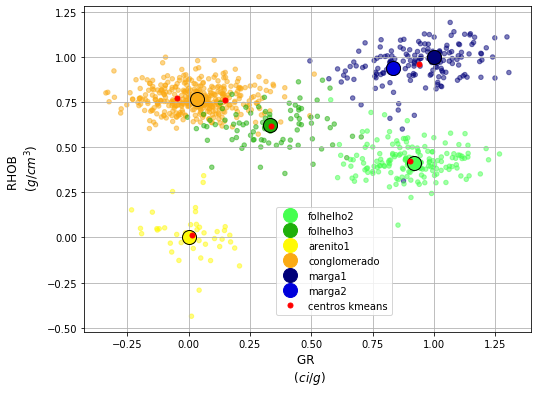

In [25]:
plt.close('all')
plt.figure(figsize=(8,6))

# Plot dos centroides verdadeiros:
for i in range(len(centroides_verdadeiros)):
    plt.plot(centroides_verdadeiros.gr_norm[i], centroides_verdadeiros.rhob_norm[i],"o", 
         color=cores.Hex[i], markersize=14, label = centroides_verdadeiros.rock[i])
    
# Plot das bordas:
for i in range(len(centroides_verdadeiros)):
    plt.plot(centroides_verdadeiros.gr_norm[i], centroides_verdadeiros.rhob_norm[i],"ok",mfc='none', 
          markersize=14)

# Plot dos centroides do kmeans:
centersa = estimators.cluster_centers_
plt.plot(centersa[:,1], centersa[:,0], 'or',alpha=1.0, markersize=5, label = "centros kmeans")
plt.legend()
plt.grid(True)

plt.scatter(np.array(data_10.gr_norm), np.array(data_10.rhob_norm), c=cores.Hex[imelhor[estimators.labels_]]
            , s=20, alpha=0.5) 

plt.legend(bbox_to_anchor=(0.7, .4))

plt.xlabel('GR \n $(ci/g)$', fontsize = 12)
plt.ylabel('RHOB \n $(g/cm^{3})$', fontsize = 12)

plt.grid(True)
plt.savefig('../final/GRxRHOB.pdf', dpi=300,  bbox_inches = 'tight', transparent = True)
plt.savefig('../final/GRxRHOB.png', dpi=300,  bbox_inches = 'tight', transparent = False)


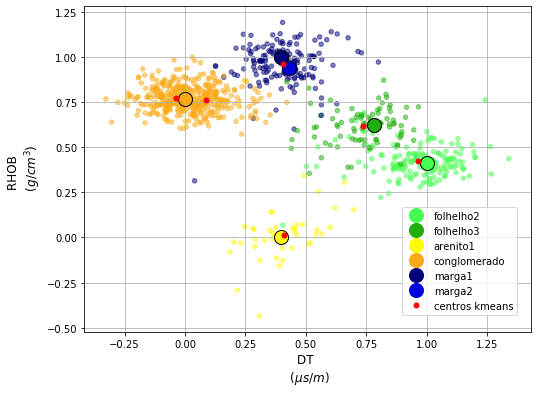

In [26]:
plt.close('all')
plt.figure(figsize=(8,6))

# Plot dos centroides verdadeiros:
for i in range(len(centroides_verdadeiros)):
    plt.plot(centroides_verdadeiros.dt_norm[i], centroides_verdadeiros.rhob_norm[i],"o", 
         color=cores.Hex[i], markersize=14, label = centroides_verdadeiros.rock[i])
    
# Plot das bordas:
for i in range(len(centroides_verdadeiros)):
    plt.plot(centroides_verdadeiros.dt_norm[i], centroides_verdadeiros.rhob_norm[i],"ok",mfc='none', 
          markersize=14)

# Plot dos centroides do kmeans:
centersa = estimators.cluster_centers_
plt.plot(centersa[:,2], centersa[:,0], 'or',alpha=1.0, markersize=5, label = "centros kmeans")
plt.legend()
plt.grid(True)

plt.scatter(np.array(data_10.dt_norm), np.array(data_10.rhob_norm), c=cores.Hex[imelhor[estimators.labels_]]
            , s=20, alpha=0.5) 

plt.legend(bbox_to_anchor=(0.7, .4))

plt.xlabel('DT \n $(\mu s/m)$', fontsize = 12)
plt.ylabel('RHOB \n $(g/cm^{3})$', fontsize = 12)

plt.grid(True)
plt.savefig('../final/DTxRHOB.pdf', dpi=300,  bbox_inches = 'tight', transparent = True)
plt.savefig('../final/DTxRHOB.png', dpi=300,  bbox_inches = 'tight', transparent = False)


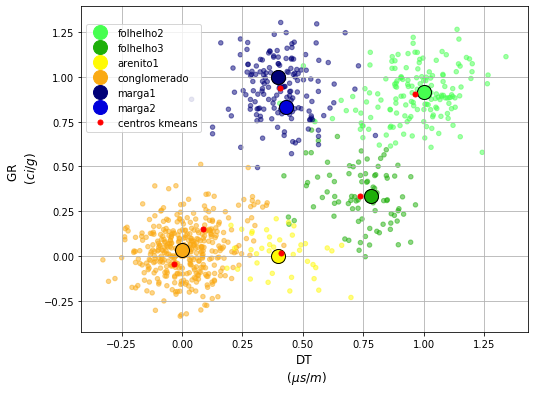

In [27]:
import matplotlib.patches as mpatches

plt.close('all')
plt.figure(figsize=(8,6))

# Plot dos centroides verdadeiros:
for i in range(len(centroides_verdadeiros)):
    plt.plot(centroides_verdadeiros.dt_norm[i], centroides_verdadeiros.gr_norm[i],"o", 
         color=cores.Hex[i], markersize=14, label = centroides_verdadeiros.rock[i])
    
# Plot das bordas:
for i in range(len(centroides_verdadeiros)):
    plt.plot(centroides_verdadeiros.dt_norm[i], centroides_verdadeiros.gr_norm[i],"ok",mfc='none', 
          markersize=14)

# Plot dos centroides do kmeans:
centersa = estimators.cluster_centers_
plt.plot(centersa[:,2], centersa[:,1], 'or',alpha=1.0, markersize=5, label = "centros kmeans")
plt.legend()
plt.grid(True)

plt.scatter(np.array(data_10.dt_norm), np.array(data_10.gr_norm), c=cores.Hex[imelhor[estimators.labels_]]
            , s=20, alpha=0.5) 

plt.legend(bbox_to_anchor=(.28, .6))

plt.xlabel('DT\n $(\mu s/m)$', fontsize = 12)
plt.ylabel('GR \n $(ci/g)$', fontsize = 12)

plt.grid(True)
plt.savefig('../final/DTxGR.pdf', dpi=300,  bbox_inches = 'tight', transparent = True)
plt.savefig('../final/DTxGR.png', dpi=300,  bbox_inches = 'tight', transparent = False)


#### Gráfico de dispersão 3D classificados 

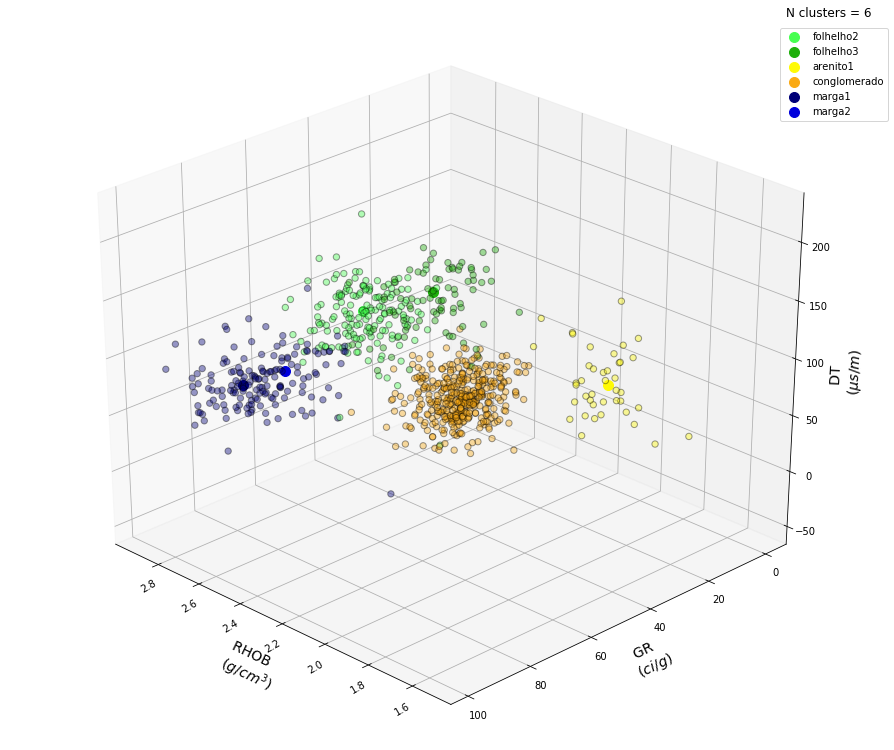

In [28]:
fig = plt.figure(0, figsize=(12,10))
plt.clf()
ax = Axes3D(fig, elev=30, azim=135)
plt.cla()

ax.scatter(data_10.rhob, 
           data_10.gr,
           data_10.dt,
           edgecolor='k',
           s=40,
           c=cores.Hex[imelhor[estimators.labels_]],
          alpha=0.4)

# Plot dos centroides verdadeiros:
for i in range(len(centroides_verdadeiros)):
    ax.scatter(centroides_verdadeiros.rhob[i], 
               centroides_verdadeiros.gr[i], 
               centroides_verdadeiros.dt[i],
               s = 100,
               color=cores.Hex[i],  
               label = centroides_verdadeiros.rock[i])   
    
ax.legend(bbox_to_anchor=(1.0, 0, 0.025, 1.0))

ax.set_zlabel('DT \n $(\mu s/m)$', fontsize = 14, labelpad=10)
ax.set_xlabel('RHOB \n $(g/cm^{3})$', fontsize = 14, labelpad=15)
ax.set_ylabel('GR \n $(ci/g$)', fontsize = 14, labelpad=10)

plt.grid(True)
plt.title('N clusters = 6', loc='right')
plt.savefig('../final/3D.pdf', dpi=300,  bbox_inches = 'tight', transparent = True)
plt.xticks(rotation=30) 
plt.show()

# FIM